<img src="images.jpg" style="width:100%; height:250px;">

<center><h1>Novel Coronavirus (COVID-19) Exploratory Data Analysis and Forecasting</h1></center>

# Introduction
## Coronavirus
Coronviruses are a group of RNA viruses that are transmitted between humans and animals. They affect different people in different ways. Most infected people will develop mild to moderate illness and recover without hospitalization.

More Common symptoms include from fever, dry cough, respiratory symptoms and breathing difficulties. Less common symptoms include from aches and pains, sore throat, diarrhoea, conjunctivitis, headache, loss of taste or smell, a rash on skin, or discolouration of fingers or toes. In severe cases, it can cause pneumonia, severe acute respiratory syndrome (SARS), kidney failure and even death. 

Coronaviruses are also **asymptomatic**, means a person can be a carrier for the infection but experiences no symptoms.
## Novel Coronavirus (nCOV)
A **novel coronavirus (nCoV)** is a new strain that has not been previously identified in humans.
## COVID-19 (Corona Virus Disease 2019)
- Caused by a **SARS-COV-2** corona virus.
- First identified in **Wuhan, Hubei, China**. Earliest reported symptoms reported in **November 2019**.
- First cases were linked to contact with the Huanan Seafood Wholesale Market, which sold live animals.
- On **30 January** the WHO declared the outbreak to be a **Public Health Emergency of International Concern**.

## Existing Datasets
We will use following Github and Kaggle datasets to help us in this analysis.

- <a style="text-decoration:none;" href="https://github.com/CSSEGISandData/COVID-19">Novel Coronavirus (COVID-19) Cases, provided by JHU CSSE</a>
- <a style="text-decoration:none;" href="https://www.kaggle.com/c/covid19-global-forecasting-week-1">COVID19 Global Forecasting (Week 1)</a>
- <a style="text-decoration:none;" href="https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset">Novel Corona Virus 2019 Dataset</a>
- <a style="text-decoration:none;" href="https://www.kaggle.com/imdevskp/corona-virus-report">COVID-19 Complete Dataset (Updated every 24hrs)</a>

# Exploratory Data Analysis
Let's start by importing the necessary libraries.

In [1]:
# Import Statements
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

# Plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
from plotly.subplots import make_subplots
# Interactive Leaflet Maps with Folium
import folium

# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

## Custom Data Loading

In [2]:
# Load Train and Test Data
df_train = pd.read_csv('global_forecasting_week_1/train.csv', 
                       parse_dates=['Date'])
df_test = pd.read_csv('global_forecasting_week_1/test.csv', 
                      parse_dates=['Date'])
cleaned_data = pd.read_csv('covid_19_dataset/covid_19_clean_complete.csv', 
                           parse_dates=['Date'])

# Print Shape and Memory Usage
print('Train Set Shape: ', df_train.shape)
print('Train Set Memory Usage: {:.2f} MB'.format(
    df_train.memory_usage().sum() / 1024**2))
print('Test Set Shape: ', df_test.shape)
print('Test Set Memory Usage: {:.2f} MB'.format(
    df_test.memory_usage().sum() / 1024**2))
print('COVID-19 Cleaned Data Shape: ', cleaned_data.shape)
print('COVID-19 Cleaned Data Memory Usage: {:.2f} MB'.format(
    cleaned_data.memory_usage().sum() / 1024**2))

Train Set Shape:  (17892, 8)
Train Set Memory Usage: 1.09 MB
Test Set Shape:  (12212, 6)
Test Set Memory Usage: 0.56 MB
COVID-19 Cleaned Data Shape:  (49068, 10)
COVID-19 Cleaned Data Memory Usage: 3.74 MB


In [3]:
# Train Data Info
print(df_train.info())
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17892 entries, 0 to 17891
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              17892 non-null  int64         
 1   Province/State  8190 non-null   object        
 2   Country/Region  17892 non-null  object        
 3   Lat             17892 non-null  float64       
 4   Long            17892 non-null  float64       
 5   Date            17892 non-null  datetime64[ns]
 6   ConfirmedCases  17892 non-null  float64       
 7   Fatalities      17892 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.1+ MB
None


,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [4]:
# Test Data Info
print(df_test.info())
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12212 entries, 0 to 12211
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ForecastId      12212 non-null  int64         
 1   Province/State  5590 non-null   object        
 2   Country/Region  12212 non-null  object        
 3   Lat             12212 non-null  float64       
 4   Long            12212 non-null  float64       
 5   Date            12212 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 572.6+ KB
None


,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,NaN,Afghanistan,33.0,65.0,2020-03-12
1,2,NaN,Afghanistan,33.0,65.0,2020-03-13
2,3,NaN,Afghanistan,33.0,65.0,2020-03-14
3,4,NaN,Afghanistan,33.0,65.0,2020-03-15
4,5,NaN,Afghanistan,33.0,65.0,2020-03-16


In [5]:
# Covid-19 Cleaned Data Info
print(cleaned_data.info())
cleaned_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB
None


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


## Data Preprocessing
### Cleaning Data

In [6]:
# Cases
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']

# Active = Confirmed - Deaths - Recovered
cleaned_data['Active'] = cleaned_data['Confirmed'] - cleaned_data['Deaths'] - cleaned_data['Recovered']

# Filling missing values
cleaned_data['Province/State'] = cleaned_data['Province/State'].fillna('')
cleaned_data[cases] = cleaned_data[cases].fillna(0)

cleaned_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


The cleaned data from <a style="text-decoration:none;" href="https://www.kaggle.com/imdevskp/corona-virus-report">COVID-19 Complete Dataset (Updated every 24hrs)</a> is used for visualizations.

Let's look at the **Confirmed**, **Deaths**, **Recovered** and **Active** cases world wide in all over Country/Region and dig deeper into top 5 Country/Region.

## Cases World Wide

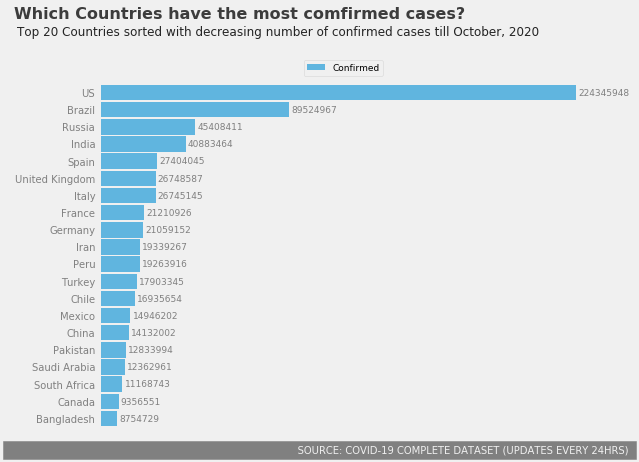

In [7]:
global_confirmed_cases = pd.DataFrame(cleaned_data.groupby(
    'Country/Region')['Confirmed'].sum())
global_confirmed_cases['Country/Region'] = global_confirmed_cases.index
global_confirmed_cases.index = np.arange(0, len(global_confirmed_cases))

global_confirmed_cases = (global_confirmed_cases.sort_values('Confirmed', ascending=False)[:20][::-1]).reset_index()
c_graph = global_confirmed_cases.plot.barh(x='Country/Region', y='Confirmed', width=0.9, alpha=0.6, align='center', figsize=(8,6))
c_graph.grid(False)

for index, value in enumerate(global_confirmed_cases['Confirmed']):
    c_graph.text(value + 1e6, index - 0.17, str(value), fontsize=9, color='gray')

c_graph.yaxis.label.set_visible(False)
x = c_graph.xaxis.set_ticklabels([])
x = c_graph.yaxis.set_tick_params(labelsize=10, labelcolor='gray')
c_graph.legend(bbox_to_anchor=(0.4, 1.0), fontsize=9)

x = c_graph.text(x = -0.4e8, y = 23.3, s = "Which Countries have the most comfirmed cases?",
               fontsize = 16, weight = 'bold', alpha = .75)
x = c_graph.text(x = -0.385e8, y = 22.3, s = "Top 20 Countries sorted with decreasing number of confirmed cases till October, 2020",
               fontsize = 12, alpha = .85)
x = c_graph.text(x = -0.43e8, y = -2.0,
    s = '                                                                                             SOURCE: COVID-19 COMPLETE DATASET (UPDATES EVERY 24HRS) ',
    fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')

x = c_graph.axvline(x = 0.0, color = 'black', linewidth = 4.0)

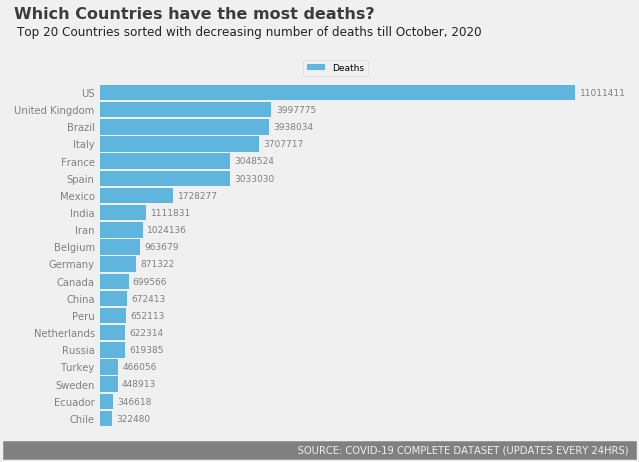

In [8]:
global_death_cases = pd.DataFrame(cleaned_data.groupby(
    'Country/Region')['Deaths'].sum())
global_death_cases['Country/Region'] = global_death_cases.index
global_death_cases.index = np.arange(0, len(global_death_cases))

global_death_cases = (global_death_cases.sort_values('Deaths', ascending=False)[:20][::-1]).reset_index()
c_graph = global_death_cases.plot.barh(x='Country/Region', y='Deaths', width=0.9, alpha=0.6, align='center', figsize=(8,6))
c_graph.grid(False)

for index, value in enumerate(global_death_cases['Deaths']):
    c_graph.text(value + 1e5, index - 0.17, str(value), fontsize=9, color='gray')

c_graph.yaxis.label.set_visible(False)
x = c_graph.xaxis.set_ticklabels([])
x = c_graph.yaxis.set_tick_params(labelsize=10, labelcolor='gray')
c_graph.legend(bbox_to_anchor=(0.4, 1.0), fontsize=9)

x = c_graph.text(x = -1.95e6, y = 23.3, s = "Which Countries have the most deaths?",
               fontsize = 16, weight = 'bold', alpha = .75)
x = c_graph.text(x = -1.87e6, y = 22.3, s = "Top 20 Countries sorted with decreasing number of deaths till October, 2020",
               fontsize = 12, alpha = .85)
x = c_graph.text(x = -2.1e6, y = -2.0,
    s = '                                                                                             SOURCE: COVID-19 COMPLETE DATASET (UPDATES EVERY 24HRS) ',
    fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')

x = c_graph.axvline(x = 0.0, color = 'black', linewidth = 4.0)

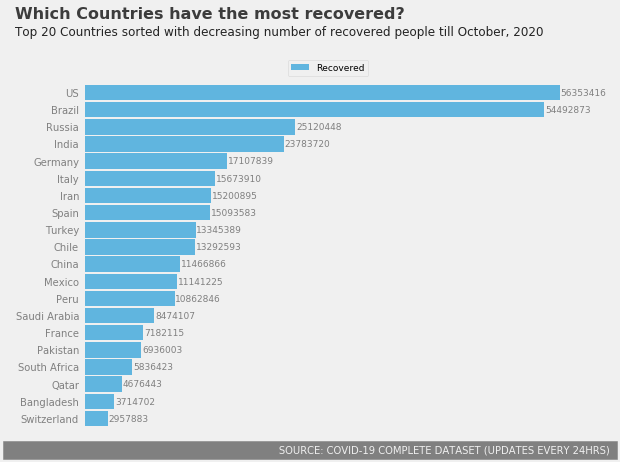

In [9]:
global_recovered_cases = pd.DataFrame(cleaned_data.groupby(
    'Country/Region')['Recovered'].sum())
global_recovered_cases['Country/Region'] = global_recovered_cases.index
global_recovered_cases.index = np.arange(0, len(global_recovered_cases))

global_recovered_cases = (global_recovered_cases.sort_values('Recovered', ascending=False)[:20][::-1]).reset_index()
c_graph = global_recovered_cases.plot.barh(x='Country/Region', y='Recovered', width=0.9, alpha=0.6, align='center', figsize=(8,6))
c_graph.grid(False)

for index, value in enumerate(global_recovered_cases['Recovered']):
    c_graph.text(value + 1e5, index - 0.17, str(value), fontsize=9, color='gray')

c_graph.yaxis.label.set_visible(False)
x = c_graph.xaxis.set_ticklabels([])
x = c_graph.yaxis.set_tick_params(labelsize=10, labelcolor='gray')
c_graph.legend(bbox_to_anchor=(0.4, 1.0), fontsize=9)

x = c_graph.text(x = -8.0e6, y = 23.3, s = "Which Countries have the most recovered?",
               fontsize = 16, weight = 'bold', alpha = .75)
x = c_graph.text(x = -8.0e6, y = 22.3, s = "Top 20 Countries sorted with decreasing number of recovered people till October, 2020",
               fontsize = 12, alpha = .85)
x = c_graph.text(x = -8.9e6, y = -2.0,
    s = '                                                                                       SOURCE: COVID-19 COMPLETE DATASET (UPDATES EVERY 24HRS) ',
    fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')

x = c_graph.axvline(x = 0.0, color = 'black', linewidth = 4.0)

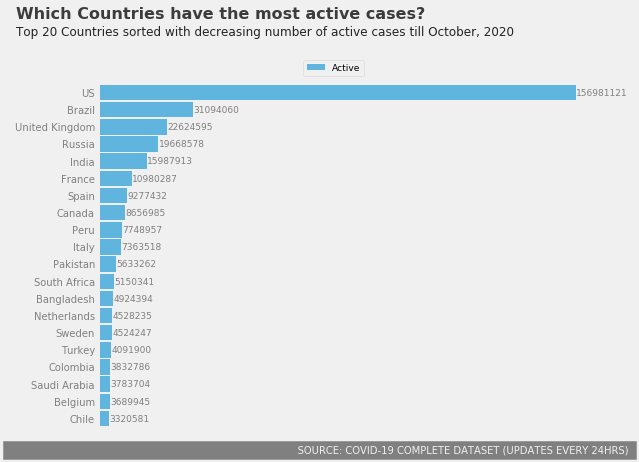

In [10]:
global_active_cases = pd.DataFrame(cleaned_data.groupby(
    'Country/Region')['Active'].sum())
global_active_cases['Country/Region'] = global_active_cases.index
global_active_cases.index = np.arange(0, len(global_active_cases))

global_active_cases = (global_active_cases.sort_values('Active', ascending=False)[:20][::-1]).reset_index()
c_graph = global_active_cases.plot.barh(x='Country/Region', y='Active', width=0.9, alpha=0.6, align='center', figsize=(8,6))
c_graph.grid(False)

for index, value in enumerate(global_active_cases['Active']):
    c_graph.text(value + 1e5, index - 0.17, str(value), fontsize=9, color='gray')

c_graph.yaxis.label.set_visible(False)
x = c_graph.xaxis.set_ticklabels([])
x = c_graph.yaxis.set_tick_params(labelsize=10, labelcolor='gray')
c_graph.legend(bbox_to_anchor=(0.4, 1.0), fontsize=9)

x = c_graph.text(x = -27e6, y = 23.3, s = "Which Countries have the most active cases?",
               fontsize = 16, weight = 'bold', alpha = .75)
x = c_graph.text(x = -27e6, y = 22.3, s = "Top 20 Countries sorted with decreasing number of active cases till October, 2020",
               fontsize = 12, alpha = .85)
x = c_graph.text(x = -30e6, y = -2.0,
    s = '                                                                                             SOURCE: COVID-19 COMPLETE DATASET (UPDATES EVERY 24HRS) ',
    fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')

x = c_graph.axvline(x = 0.0, color = 'black', linewidth = 4.0)

**From these visualizations we can understand that**

- US has the most Confirmed, Deaths, Recovered and Active people in the world
- followed by Brazil, UK, Russia and India in top 4 places and then the rest of the countries

##  Global Spread Over Time
Now let's make visualizations according to the above result

In [11]:
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255]]

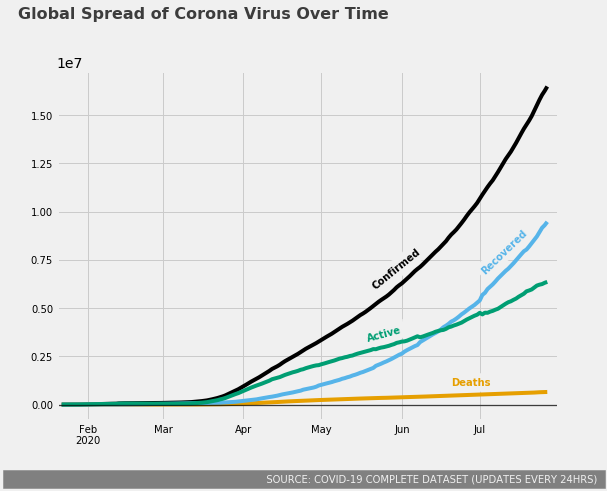

In [12]:
# Global spread of Coronavirus over time
global_spread = cleaned_data.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index().set_index('Date')

c_graph = global_spread.plot(figsize=(8,6), color=colors, legend = False)
c_graph.tick_params(axis = 'both', which = 'major', labelsize = 10)
c_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
c_graph.set_xlim(left = "2020-01-20", right = "2020-07-31")

c_graph.xaxis.label.set_visible(False)

x = c_graph.text(x = "2020-01-05", y=2e7, s = "Global Spread of Corona Virus Over Time",
               fontsize = 16, weight = 'bold', alpha = .75)
x = c_graph.text(x = "2020-01-01", y = -0.4e7,
    s = '                                                                                   SOURCE: COVID-19 COMPLETE DATASET (UPDATES EVERY 24HRS) ',
    fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')

x = c_graph.text(x = "2020-05-20", y = 0.6e7, s = 'Confirmed', color = colors[0], 
             weight = 'bold', rotation = 39, fontsize=10, backgroundcolor = '#f0f0f0')
x = c_graph.text(x = "2020-06-20", y = 0.1e7, s = 'Deaths', color = colors[1], 
             weight = 'bold', rotation = 0, fontsize=10, backgroundcolor = '#f0f0f0')
x = c_graph.text(x = "2020-07-01", y = 0.68e7, s = 'Recovered', color = colors[2], 
             weight = 'bold', rotation = 44, fontsize=10, backgroundcolor = '#f0f0f0')
x = c_graph.text(x = "2020-05-18", y = 0.33e7, s = 'Active', color = colors[3], 
             weight = 'bold', rotation = 15, fontsize=10, backgroundcolor = '#f0f0f0')


The above visual represents the Global Spread of COVID-19 in all over time. The Confirmed cases are more than 15 million and Deaths are around 1 million. The Recovered are more than 9 million and Active are still around 6 million.

### US

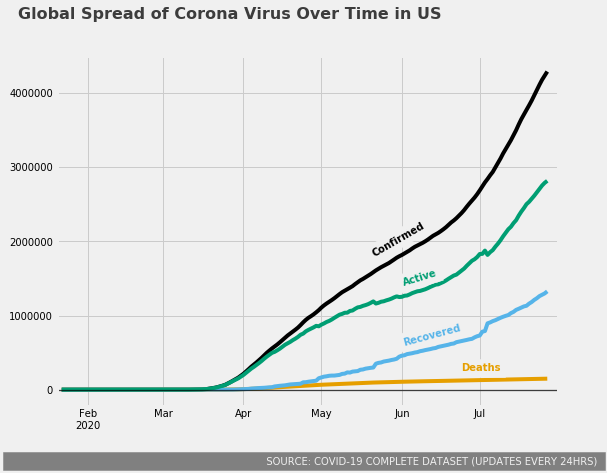

In [16]:
grouped_us = cleaned_data[cleaned_data['Country/Region'] == 'US']
global_spread_us = grouped_us.groupby(
    'Date')['Confirmed', 'Deaths','Recovered','Active'].sum().reset_index()

c_graph = global_spread_us.plot(x='Date', y=['Confirmed', 'Deaths','Recovered','Active'], figsize=(8,6), color=colors, legend = False)
c_graph.tick_params(axis = 'both', which = 'major', labelsize = 10)
c_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
c_graph.set_xlim(left = "2020-01-20", right = "2020-07-31")

c_graph.xaxis.label.set_visible(False)

x = c_graph.text(x = "2020-01-05", y=5e6, s = "Global Spread of Corona Virus Over Time in US",
               fontsize = 16, weight = 'bold', alpha = .75)
x = c_graph.text(x = "2020-01-01", y = -1e6,
    s = '                                                                                   SOURCE: COVID-19 COMPLETE DATASET (UPDATES EVERY 24HRS) ',
    fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')

x = c_graph.text(x = "2020-05-20", y = 1.8e6, s = 'Confirmed', color = colors[0], 
             weight = 'bold', rotation = 30, fontsize=10, backgroundcolor = '#f0f0f0')
x = c_graph.text(x = "2020-06-24", y = 0.25e6, s = 'Deaths', color = colors[1], 
             weight = 'bold', rotation = 0, fontsize=10, backgroundcolor = '#f0f0f0')
x = c_graph.text(x = "2020-06-01", y = 0.6e6, s = 'Recovered', color = colors[2], 
             weight = 'bold', rotation = 15, fontsize=10, backgroundcolor = '#f0f0f0')
x = c_graph.text(x = "2020-06-01", y = 1.4e6, s = 'Active', color = colors[3], 
             weight = 'bold', rotation = 17, fontsize=10, backgroundcolor = '#f0f0f0')


In [55]:
# create map and display it
latitude = 40
longitude = -100
world_map = folium.Map(location=[latitude, longitude], zoom_start=5.0)

for lat, lon, Confirmed,Deaths,Recovered,name in zip(grouped_us['Lat'], grouped_us['Long'], grouped_us['Confirmed'],grouped_us['Deaths'],grouped_us['Recovered'], grouped_us['Country/Region']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(Confirmed) + '<br>'
                                '<strong>Recovered Cases</strong>: ' + str(Recovered) +'<br>'
                                '<strong>Deaths Cases</strong>: ' + str(Deaths) +'<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(world_map)
world_map

### Brazil

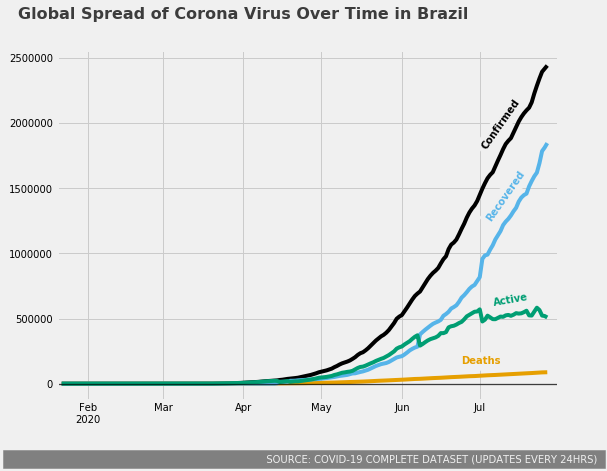

In [48]:
grouped_brazil = cleaned_data[cleaned_data['Country/Region'] == 'Brazil']
global_spread_brazil = grouped_brazil.groupby(
    'Date')['Confirmed', 'Deaths','Recovered','Active'].sum().reset_index()

c_graph = global_spread_brazil.plot(x='Date', y=['Confirmed', 'Deaths','Recovered','Active'], figsize=(8,6), color=colors, legend = False)
c_graph.tick_params(axis = 'both', which = 'major', labelsize = 10)
c_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
c_graph.set_xlim(left = "2020-01-20", right = "2020-07-31")

c_graph.xaxis.label.set_visible(False)

x = c_graph.text(x = "2020-01-05", y=2.8e6, s = "Global Spread of Corona Virus Over Time in Brazil",
               fontsize = 16, weight = 'bold', alpha = .75)
x = c_graph.text(x = "2020-01-01", y = -0.6e6,
    s = '                                                                                   SOURCE: COVID-19 COMPLETE DATASET (UPDATES EVERY 24HRS) ',
    fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')

x = c_graph.text(x = "2020-07-01", y = 1.8e6, s = 'Confirmed', color = colors[0], 
             weight = 'bold', rotation = 55, fontsize=10, backgroundcolor = '#f0f0f0')
x = c_graph.text(x = "2020-06-24", y = 0.15e6, s = 'Deaths', color = colors[1], 
             weight = 'bold', rotation = 0, fontsize=10, backgroundcolor = '#f0f0f0')
x = c_graph.text(x = "2020-07-03", y = 1.25e6, s = 'Recovered', color = colors[2], 
             weight = 'bold', rotation = 55, fontsize=10, backgroundcolor = '#f0f0f0')
x = c_graph.text(x = "2020-07-06", y = 0.6e6, s = 'Active', color = colors[3], 
             weight = 'bold', rotation = 10, fontsize=10, backgroundcolor = '#f0f0f0')


In [54]:
# create map and display it
latitude = -14
longitude = -51
world_map = folium.Map(location=[latitude, longitude], zoom_start=5.0)

for lat, lon, Confirmed,Deaths,Recovered,name in zip(grouped_brazil['Lat'], grouped_brazil['Long'], grouped_brazil['Confirmed'],grouped_brazil['Deaths'],grouped_brazil['Recovered'], grouped_brazil['Country/Region']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(Confirmed) + '<br>'
                                '<strong>Recovered Cases</strong>: ' + str(Recovered) +'<br>'
                                '<strong>Deaths Cases</strong>: ' + str(Deaths) +'<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(world_map)
world_map

### United Kingdom

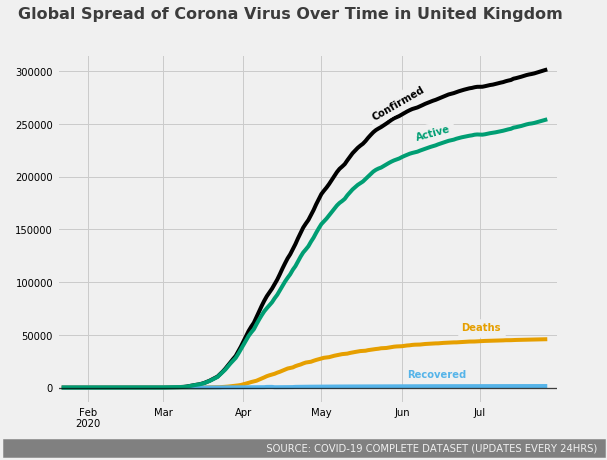

In [76]:
grouped_uk = cleaned_data[cleaned_data['Country/Region'] == 'United Kingdom']
global_spread_uk = grouped_uk.groupby(
    'Date')['Confirmed', 'Deaths','Recovered','Active'].sum().reset_index()

c_graph = global_spread_uk.plot(x='Date', y=['Confirmed', 'Deaths','Recovered','Active'], figsize=(8,6), color=colors, legend = False)
c_graph.tick_params(axis = 'both', which = 'major', labelsize = 10)
c_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
c_graph.set_xlim(left = "2020-01-20", right = "2020-07-31")

c_graph.xaxis.label.set_visible(False)

x = c_graph.text(x = "2020-01-05", y=3.5e5, s = "Global Spread of Corona Virus Over Time in United Kingdom",
               fontsize = 16, weight = 'bold', alpha = .75)
x = c_graph.text(x = "2020-01-01", y = -0.6e5,
    s = '                                                                                   SOURCE: COVID-19 COMPLETE DATASET (UPDATES EVERY 24HRS) ',
    fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')

x = c_graph.text(x = "2020-05-20", y = 2.54e5, s = 'Confirmed', color = colors[0], 
             weight = 'bold', rotation = 30, fontsize=10, backgroundcolor = '#f0f0f0')
x = c_graph.text(x = "2020-06-24", y = 0.54e5, s = 'Deaths', color = colors[1], 
             weight = 'bold', rotation = 0, fontsize=10, backgroundcolor = '#f0f0f0')
x = c_graph.text(x = "2020-06-03", y = 0.1e5, s = 'Recovered', color = colors[2], 
             weight = 'bold', rotation = 0, fontsize=10, backgroundcolor = '#f0f0f0')
x = c_graph.text(x = "2020-06-06", y = 2.35e5, s = 'Active', color = colors[3], 
             weight = 'bold', rotation = 15, fontsize=10, backgroundcolor = '#f0f0f0')
